In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
import re
import MeCab
from collections import Counter
import itertools
import networkx as nx

In [2]:
df1 = pd.read_csv("16p_mbti.csv")
df2 = pd.read_csv("fav.csv")

In [3]:
df=pd.merge(df2, df1, on ='user_id', how='left')

In [4]:
#pd.DataFrame(df['user_mbti'].value_counts())
#df.fillna({'user_statuses_count': 0})

In [5]:
target = pd.DataFrame(df.iloc[:,13].fillna(0))
boston = df.iloc[:,3:5]

In [6]:
#target=target.rename(columns={'retweet_count':0})
#boston=boston.replace([np.inf, -np.inf], 0)
#boston=boston.replace([np.inf, -np.inf], 0)
boston=boston.fillna({'count_EI': 0, 'count_NS': 0, 'count_TF': 0, 'count_JP': 0})

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import *

#重回帰モデルの作成
def stats_regress(df_x, df_y):
    model = sm.OLS(df_y, sm.add_constant(df_x))
    result = model.fit()
    print(result.summary())

    return model

#VIF(分散拡大係数)を計算する
def show_vif(model):
    num_cols = model.exog.shape[1]
    vifs = [variance_inflation_factor(model.exog, i) for i in range(num_cols)]
    pdv = pd.DataFrame(vifs, index=model.exog_names, columns=["VIF"])
    print(pdv)

if __name__ == '__main__':
    #dset = datasets.load_boston()
    #boston = pd.DataFrame(dset.data)
    #boston.columns = dset.feature_names
    #target = pd.DataFrame(dset.target)
    model = stats_regress(boston, target)
    show_vif(model)

                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7368.
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:52:33   Log-Likelihood:            -2.1858e+06
No. Observations:              190464   AIC:                         4.372e+06
Df Residuals:                  190461   BIC:                         4.372e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6109.8479     70.124     87.129      0.0

In [75]:
fav_df=df.dropna(subset=['user_tweet_created_at_hour'])
fav_df.head()


,Unnamed: 0_x,count_EI,count_JP,count_NS,count_TF,count_fav_user,created_at_ja,favorite_count,id,ratio_EI,...,user_followee_count,user_follower_count,user_mbti,user_screen_name,user_statuses_count,user_tweet_created_at_day,user_tweet_created_at_hour,user_tweet_created_at_month,user_tweet_created_at_year,user_tweet_created_at_ym
43,43,523.0,674.0,1870.0,789.0,2490.0,2.018113e+13,168334.0,1.067945e+18,0.210040,...,597.0,461.0,INFP,chin9aki_NEO,135493.0,21.0,8.0,3.0,2017.0,201703.0
59,59,443.0,723.0,1681.0,671.0,2352.0,2.018102e+13,279683.0,1.053517e+18,0.188350,...,161.0,682.0,INFJ,shirokenoneko,598.0,22.0,23.0,6.0,2018.0,201806.0
62,62,467.0,656.0,1719.0,704.0,2311.0,2.018102e+13,200323.0,1.052392e+18,0.202077,...,1591.0,16653.0,ENTP,0taku0,23680.0,28.0,23.0,5.0,2018.0,201805.0
80,80,441.0,627.0,1596.0,604.0,2184.0,2.018111e+13,184021.0,1.060752e+18,0.201923,...,429.0,467.0,ENFP,mountain_white,226892.0,14.0,0.0,5.0,2017.0,201705.0
92,92,526.0,719.0,1484.0,603.0,2118.0,2.018091e+13,423453.0,1.038407e+18,0.248347,...,393.0,352.0,INFP,HPVdixEcbDoEKW4,6215.0,20.0,8.0,3.0,2017.0,201703.0


In [78]:
#cut_range=[1000,3000,5000,7000,10000]
#pd.cut(fav_df['user_favourites_count'], cut_range).value_counts(sort=False).tolist()
#fav_df['user_followee_count'] .where(fav_df['user_followee_count'] >200, 2, inplace=True)
fav_df.loc[fav_df['user_followee_count'] < 100, 'user_followee_count'] = 1
#fav_df['user_followee_count']=fav_df['user_followee_count'].map({(0:100): 0, (100:10000): 2, (10000:): 3})
#df['state'] = df['state'].map({'NY': 0, 'CA': 1, 'TX': 2}
fav_df

AttributeError: 'int' object has no attribute 'loc'

In [287]:
len_sentence_array = np.array([len(v) for v in list(df[df['ratio_NS']>0.7]['description'].dropna())])

In [288]:
def show_len_str_dist(len_str_array):
    print('長さの平均', len_str_array.mean())
    print('長さの分散', len_str_array.var())
    print('長さの標準偏差', len_str_array.std())

    plt.rcParams['font.family'] = 'IPAexGothic'
    plt.figure()
    plt.title('文字数')
    plt.xlabel('長さ')
    plt.ylabel('頻度')
    plt.hist(len_str_array, color='blue', bins=40)
    plt.show()

長さの平均 80.38866160140269
長さの分散 1777.0722034103255
長さの標準偏差 42.1553342224958


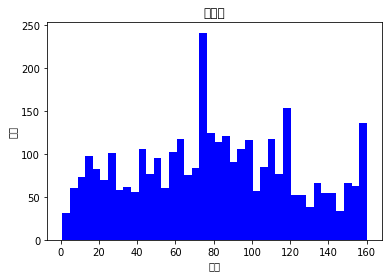

In [289]:
show_len_str_dist(len_sentence_array)

長さの平均 88.54089709762533
長さの分散 2196.408749590994
長さの標準偏差 46.865859104373556


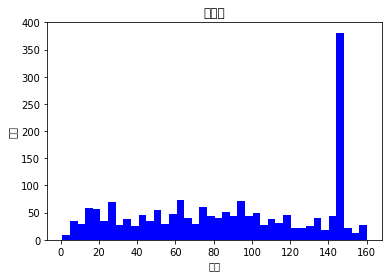

In [286]:
len_sentence_array = np.array([len(v) for v in list(df[df['ratio_NS']<0.7]['description'].dropna())])
show_len_str_dist(len_sentence_array)

In [13]:
def text2word_list(text):
    tag = MeCab.Tagger("-Ochasen")
    chasen_list = tag.parse(text).splitlines()
    word_list = []
    for chasen in chasen_list:
        cha_list = chasen.split("\t")
        if len(cha_list) >= 3:
            hinshi = cha_list[3].split('-')[0]
            if hinshi == "名詞":# or hinshi == "動詞":
                #word_list.append(cha_list[0])#そのまま
                word_list.append(cha_list[2])#原型
    return word_list

df1['description']=df1['description'].fillna("")
df1['word_list']=df1['description'].apply(text2word_list)

In [22]:
def remove_symbol(word_list):
    new_word_list = []
    for word in word_list:
        word = re.sub('[，,]','、',word)
        word = re.sub('[．.]','。',word)
        #len_ja = len(re.findall('[0-9a-zA-Zぁ-んァ-ヶ一-龥々ー、。]', word))
        len_ja = len(re.findall('[ぁ-んァ-ヶ一-龥々ー、。]', word))   
        if len(word) != (len_ja):
            continue
        new_word_list.append(word)
    return new_word_list

df1['word_list_clean']=df1['word_list'].apply(remove_symbol)

In [232]:
df1

,Unnamed: 0,description,description_char_count,description_word_count,location_len,log2_description_char_count,log2_description_word_count,log2_location_len,log2_name_len,log2_screen_name_len,...,user_mbti,user_screen_name,user_statuses_count,user_tweet_created_at_day,user_tweet_created_at_hour,user_tweet_created_at_month,user_tweet_created_at_year,user_tweet_created_at_ym,word_list,word_list_clean
0,0,成人済の腐った会社員です。FRBはご自由にどうぞ。。5次元もゆるっと応援中。でじこ関係のファ...,79,36,14,6.303781,5.169925,3.807355,1.584963,2.807355,...,ESFJ,uno_umi,49190,1,0,1,2017,201701,"[成人, 済, 会社, 員, FRB, 自由, 5, 次元, 応援, 中, 関係, ファン,...","[成人, 済, 会社, 員, 自由, 次元, 応援, 中, 関係, ファン, アート, こちら]"
1,1,5th,3,2,0,1.584963,1.000000,-1.000000,1.584963,3.321928,...,ISTP,monaka3740,3681,1,2,1,2017,201701,"[5, th]",[]
2,2,ただのオタです。たまにこじらせネガティブ暴発させます。,27,15,0,4.754888,3.906891,-1.000000,2.000000,3.321928,...,INFP,nejimaru39,14345,1,2,1,2017,201701,"[ただ, オタ, たま, ネガティブ, 暴発]","[ただ, オタ, たま, ネガティブ, 暴発]"
3,3,ツイッター歴8年半、そろそろ岐路に立たされてる感ある,26,14,21,4.700440,3.807355,4.392317,3.700440,3.584963,...,INFP,DB52V_JOYPOP,224082,1,2,1,2017,201701,"[ツイッター, 歴, 8, 年, 半, 岐路, 感]","[ツイッター, 歴, 年, 半, 岐路, 感]"
4,4,趣味で主にオリジナルのイラスト、マンガを描いておりマス。リプ・メッセージ頂けると歓喜しますヒ...,81,25,3,6.339850,4.643856,1.584963,3.321928,3.700440,...,INFP,illust_eossan,2365,1,5,1,2017,201701,"[趣味, 主, オリジナル, イラスト, マンガ, マス, リプ・メッセージ, 歓喜, ヒャ...","[趣味, 主, オリジナル, イラスト, マンガ, マス, 歓喜, ヒャッハー]"
5,5,,0,0,0,-1.000000,-1.000000,-1.000000,3.459432,3.584963,...,ESTP,Artemis5371S,11,1,5,1,2017,201701,[],[]
6,6,てんしょく,5,2,0,2.321928,1.000000,-1.000000,1.584963,3.169925,...,ESFP,nes_cafe2,10796,1,6,1,2017,201701,"[てん, しょく]","[てん, しょく]"
7,7,結婚、ダイエット、仕事、そしてペットの文鳥のことなど。,27,14,6,4.754888,3.807355,2.584963,2.584963,3.321928,...,ISFJ,mariko0903,734,1,11,1,2017,201701,"[結婚, ダイエット, 仕事, ペット, 文鳥, こと]","[結婚, ダイエット, 仕事, ペット, 文鳥, こと]"
8,8,外資マン,4,2,11,2.000000,1.000000,3.459432,2.000000,2.807355,...,ISFP,Shinga8,10343,1,13,1,2017,201701,"[外資, マン]","[外資, マン]"
9,9,熊高→九州大工リアアカ→@6nlonQGEOBD2リーダー労働にモテすぎる,41,19,3,5.357552,4.247928,1.584963,1.584963,2.807355,...,ESFP,kyouyaP,154164,1,17,1,2017,201701,"[熊, 高, 九州, 大工, リア, アカ, →@, 6, nlonQGEOBD, 2, リ...","[熊, 高, 九州, 大工, リア, アカ, リーダー, 労働, モテ]"


In [26]:
all_word_list=[]
for uw_list in list(df1['word_list_clean']):
    for w in uw_list:
        all_word_list.append(w)
Counter(all_word_list).most_common()

[('好き', 16914),
 ('さん', 9273),
 ('人', 7919),
 ('ゲーム', 7880),
 ('フォロー', 7812),
 ('中', 7779),
 ('垢', 7700),
 ('成人', 7002),
 ('こと', 4663),
 ('済', 4420),
 ('最近', 4360),
 ('大好き', 4320),
 ('絵', 4317),
 ('ー', 3891),
 ('もの', 3597),
 ('無言', 3563),
 ('年', 3281),
 ('の', 3260),
 ('趣味', 3164),
 ('ン', 3065),
 ('アニメ', 3042),
 ('ちゃん', 3005),
 ('アカウント', 2972),
 ('アイコ', 2950),
 ('方', 2902),
 ('創作', 2850),
 ('者', 2748),
 ('たま', 2502),
 ('系', 2472),
 ('主', 2441),
 ('猫', 2389),
 ('基本', 2379),
 ('音楽', 2366),
 ('雑多', 2246),
 ('等', 2227),
 ('日常', 2217),
 ('自由', 2214),
 ('漫画', 2211),
 ('雑食', 2095),
 ('多め', 2080),
 ('箱', 2066),
 ('済み', 2043),
 ('ヘッダー', 2032),
 ('様', 2024),
 ('的', 2000),
 ('気軽', 1970),
 ('夢', 1944),
 ('お願い', 1878),
 ('歳', 1823),
 ('注意', 1821),
 ('月', 1776),
 ('二', 1762),
 ('ツイート', 1742),
 ('映画', 1701),
 ('女子', 1683),
 ('アイコン', 1658),
 ('事', 1654),
 ('ん', 1644),
 ('仕事', 1643),
 ('メイン', 1635),
 ('写真', 1615),
 ('時', 1609),
 ('一', 1601),
 ('鯖', 1554),
 ('用', 1550),
 ('何', 1525),
 ('小説', 1497),
 ('ネタ

In [52]:
word2index={}
for i, (w,c) in enumerate(Counter(all_word_list).most_common()):
    word2index[w]=i
    if i ==300-1:
        break

In [117]:
list(word2index.keys())

['好き',
 'さん',
 '人',
 'ゲーム',
 'フォロー',
 '中',
 '垢',
 '成人',
 'こと',
 '済',
 '最近',
 '大好き',
 '絵',
 'ー',
 'もの',
 '無言',
 '年',
 'の',
 '趣味',
 'ン',
 'アニメ',
 'ちゃん',
 'アカウント',
 'アイコ',
 '方',
 '創作',
 '者',
 'たま',
 '系',
 '主',
 '猫',
 '基本',
 '音楽',
 '雑多',
 '等',
 '日常',
 '自由',
 '漫画',
 '雑食',
 '多め',
 '箱',
 '済み',
 'ヘッダー',
 '様',
 '的',
 '気軽',
 '夢',
 'お願い',
 '歳',
 '注意',
 '月',
 '二',
 'ツイート',
 '映画',
 '女子',
 'アイコン',
 '事',
 'ん',
 '仕事',
 'メイン',
 '写真',
 '時',
 '一',
 '鯖',
 '用',
 '何',
 '小説',
 'ネタ',
 '絵描き',
 '中心',
 '日',
 'オタク',
 'ツイ',
 '現在',
 'これ',
 '活動',
 '動画',
 '気',
 'くん',
 '今',
 '勢',
 '神',
 '話',
 '失礼',
 'イラスト',
 'よう',
 '音',
 'マン',
 '酒',
 'フォロバ',
 '社会',
 'プロ',
 'リプ',
 '次',
 '艦',
 'こちら',
 '沼',
 '実況',
 '自分',
 'ブロック',
 '派',
 'グラブル',
 '目',
 'その他',
 'すき',
 'アカ',
 'ゲー',
 '人間',
 '部',
 '家',
 '私',
 '刀剣',
 '兼',
 '転載',
 'さ',
 '空',
 '人生',
 '担当',
 '世界',
 'コス',
 '東方',
 '推奨',
 'キャラ',
 '固定',
 '無断',
 '民',
 'あと',
 '愛',
 '三',
 'ジャンル',
 '作品',
 '組',
 '物',
 '地雷',
 '所属',
 'ため',
 '画像',
 'ポケモン',
 '心',
 '関係',
 '百',
 '性',
 '質問',
 '女',
 '黒',
 '会',
 '

In [54]:
df10=pd.concat([df1['word_list_clean'],df1['user_EI']],axis=1)

In [55]:
def word_list2index(word_list,word2index):
    result=np.zeros(300)
    for w in word_list:
        if w in word2index:
            result[word2index[w]]=1
    return result

df10['index_list']=df10['word_list_clean'].apply(word_list2index, word2index=word2index)

In [118]:
df_x=pd.DataFrame(np.array(list(df10['index_list'])),columns=list(word2index.keys()))
df_y=pd.DataFrame(df10['user_EI'])

In [94]:
df_x.head()
pca = PCA(n_components=10)
pca.fit(df_x)
df_x2 = pd.DataFrame(pca.fit_transform(df_x))
df_x2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.408636,0.817380,-0.484368,0.077137,0.736693,-0.441194,-0.611639,-0.396447,-0.033562,-0.252809
1,-0.382145,0.007962,-0.094959,-0.044497,-0.105626,-0.013160,-0.005701,-0.014878,0.010484,-0.071363
2,-0.330963,0.012606,-0.085928,-0.039273,-0.085992,0.004615,0.000273,-0.006389,0.008290,0.055114
3,-0.372887,-0.021402,-0.053770,-0.054486,-0.048555,-0.076986,-0.014416,-0.013223,-0.020964,-0.033584
4,-0.274781,-0.013287,0.009403,-0.063176,0.009255,0.117152,0.001361,0.051664,0.009078,0.096331


In [95]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

In [106]:
logreg = LogisticRegression(fit_intercept = False,C=1)
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
print(confusion_matrix(Y_test, Y_pred, labels=[1, 0]))
print(classification_report(Y_test, Y_pred))

/Users/Kosuke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   78  2983]
 [  233 11276]]
             precision    recall  f1-score   support

          0       0.79      0.98      0.88     11509
          1       0.25      0.03      0.05      3061

avg / total       0.68      0.78      0.70     14570



In [93]:
kfold = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 42) #"Answer to the Ultimate Question of Life, the Universe, and Everything"
model_to_CV = LogisticRegression()
 
results = model_selection.cross_val_score(model_to_CV, df_x2, df_y, cv = kfold, scoring = 'accuracy')
print("10-fold Cross Validation 平均 Accuracy: %.2f" % (results.mean()))

/Users/Kosuke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Kosuke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Kosuke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Kosuke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

10-fold Cross Validation 平均 Accuracy: 0.79


In [107]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#df_x=pd.DataFrame(np.array(list(df10['index_list'])),columns=list(word2index.keys()))
#df_y=pd.DataFrame(df10['user_EI'])

In [215]:
df11=df10[df10.user_EI==1]
df12=df10[df10.user_EI==0]

In [222]:
all_word_list=[]
for uw_list in list(df11['word_list_clean']):
    for w in uw_list:
        all_word_list.append(w)

word2index_11={}
for i, (w,c) in enumerate(Counter(all_word_list).most_common()):
    word2index_11[w]=i
    if i ==300-1:
        break

#list(word2index_11.keys())

In [221]:
all_word_list=[]
for uw_list in list(df12['word_list_clean']):
    for w in uw_list:
        all_word_list.append(w)

word2index_12={}
for i, (w,c) in enumerate(Counter(all_word_list).most_common()):
    word2index_12[w]=i
    if i ==300-1:
        break

#list(word2index_12.keys())

In [224]:
df11.head()

,word_list_clean,user_EI,index_list
0,"[成人, 済, 会社, 員, 自由, 次元, 応援, 中, 関係, ファン, アート, こちら]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
5,[],1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,"[てん, しょく]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,"[熊, 高, 九州, 大工, リア, アカ, リーダー, 労働, モテ]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,"[ツイ, 廃, 成人, 済, イベント, お祭り, 大好き, マン, 狐, アイナナ, ドラ...",1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [225]:
def word_list2index(word_list,word2index):
    result=np.zeros(300)
    for w in word_list:
        if w in word2index:
            result[word2index[w]]=1
    return result

df11['index_list']=df11['word_list_clean'].apply(word_list2index, word2index=word2index_11)
df12['index_list']=df12['word_list_clean'].apply(word_list2index, word2index=word2index_12)

/Users/Kosuke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kosuke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [226]:
df_x11=pd.DataFrame(np.array(list(df11['index_list'])),columns=list(word2index_11.keys()))
df_x12=pd.DataFrame(np.array(list(df12['index_list'])),columns=list(word2index_12.keys()))

In [227]:
frequent_itemsets11 = apriori(df_x11, min_support=0.005, use_colnames=True)
print ('frequent_itemsets\n', frequent_itemsets11)
rules1_11 = association_rules(frequent_itemsets11, metric="confidence", min_threshold=0.0001)
print('rules1\n', rules1_11)
#rules2_11 = association_rules(frequent_itemsets11, metric="lift", min_threshold=0.8)
#print('rules2\n', rules2_11)

frequent_itemsets
       support        itemsets
0    0.173041            (好き)
1    0.093306            (さん)
2    0.104084             (人)
3    0.099604             (中)
4    0.078891             (垢)
5    0.082852           (ゲーム)
6    0.082202          (フォロー)
7    0.072528            (成人)
8    0.060126           (大好き)
9    0.057074            (こと)
10   0.046490             (ー)
11   0.049477             (年)
12   0.052139            (最近)
13   0.044672             (絵)
14   0.044348             (済)
15   0.043309            (趣味)
16   0.038179           (ちゃん)
17   0.039543             (の)
18   0.039023            (もの)
19   0.040971             (ン)
20   0.036686             (方)
21   0.039543           (アイコ)
22   0.037985         (アカウント)
23   0.035972            (音楽)
24   0.033764             (者)
25   0.034673            (無言)
26   0.031946            (仕事)
27   0.031881             (系)
28   0.032855           (アニメ)
29   0.030972            (たま)
..        ...             ...
492  0.005519        

In [228]:
frequent_itemsets12 = apriori(df_x12, min_support=0.005, use_colnames=True)
print ('frequent_itemsets\n', frequent_itemsets12)
rules1_12 = association_rules(frequent_itemsets12, metric="confidence", min_threshold=0.0001)
print('rules1\n', rules1_12)

frequent_itemsets
       support           itemsets
0    0.185653               (好き)
1    0.097779               (さん)
2    0.099502              (ゲーム)
3    0.098788             (フォロー)
4    0.089876                (垢)
5    0.094489                (中)
6    0.092696                (人)
7    0.100999               (成人)
8    0.063207                (済)
9    0.055078               (こと)
10   0.057776                (絵)
11   0.059848               (最近)
12   0.051074              (大好き)
13   0.051144               (無言)
14   0.043275                (ー)
15   0.045678               (もの)
16   0.040159                (の)
17   0.041657              (アニメ)
18   0.041552               (趣味)
19   0.042092                (ン)
20   0.036051                (年)
21   0.035338               (創作)
22   0.038993            (アカウント)
23   0.040560              (アイコ)
24   0.034345              (ちゃん)
25   0.035494                (方)
26   0.034955                (者)
27   0.034102               (たま)
28   0.033127           

In [236]:
pd.DataFrame(rules1_11).sort_values('lift', ascending=False)[100:150:2]#.iloc[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
483,"(無言, 成人)",(フォロー),0.007272,0.082202,0.006493,0.892857,10.861685,0.005895,8.566110
423,"(無言, 好き)",(フォロー),0.008831,0.082202,0.007857,0.889706,10.823349,0.007131,8.321364
395,(ヘッダー),(アイコン),0.029349,0.022856,0.006558,0.223451,9.776630,0.005887,1.258317
391,(二),(創作),0.021557,0.027141,0.005519,0.256024,9.433079,0.004934,1.307648
389,(アニメ),(漫画),0.032855,0.024933,0.007467,0.227273,9.115175,0.006648,1.261851
382,(用),(アカウント),0.016557,0.037985,0.005065,0.305882,8.052810,0.004436,1.385954
381,(アイコ),(ヘッダー),0.039543,0.029349,0.009025,0.228243,7.776926,0.007865,1.257716
380,(ヘッダー),(アイコ),0.029349,0.039543,0.009025,0.307522,7.776926,0.007865,1.386986
191,(人),(狼),0.104084,0.008896,0.007077,0.067998,7.644011,0.006152,1.063414
378,(ン),(ヘッダー),0.040971,0.029349,0.009090,0.221870,7.559780,0.007888,1.247415


In [237]:
pd.DataFrame(rules1_12).sort_values('lift', ascending=False)[100:150:2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
531,(的),(基本),0.026477,0.032831,0.010114,0.381986,11.634963,0.009245,1.564962
678,"(フォロー, 成人)",(無言),0.019932,0.051144,0.011628,0.583406,11.407198,0.010609,2.277653
654,"(フォロー, 垢)",(無言),0.018017,0.051144,0.010044,0.557488,10.900426,0.009123,2.144250
684,"(フォロー, 成人)",(済み),0.019932,0.029558,0.006127,0.307424,10.400621,0.005538,1.401205
605,"(漫画, 好き)",(アニメ),0.011872,0.041657,0.005135,0.432551,10.383762,0.004641,1.688864
706,"(成人, 垢)",(済),0.021725,0.063207,0.013978,0.643429,10.179689,0.012605,2.627230
644,(漫画),"(ゲーム, アニメ)",0.029436,0.016990,0.005048,0.171496,10.094025,0.004548,1.186488
742,"(成人, 雑多)",(済),0.011071,0.063207,0.007015,0.633648,10.024933,0.006316,2.557083
753,(済),"(日常, 成人)",0.063207,0.008739,0.005536,0.087579,10.022059,0.004983,1.086408
606,"(好き, アニメ)",(漫画),0.017651,0.029436,0.005135,0.290927,9.883261,0.004616,1.368778
